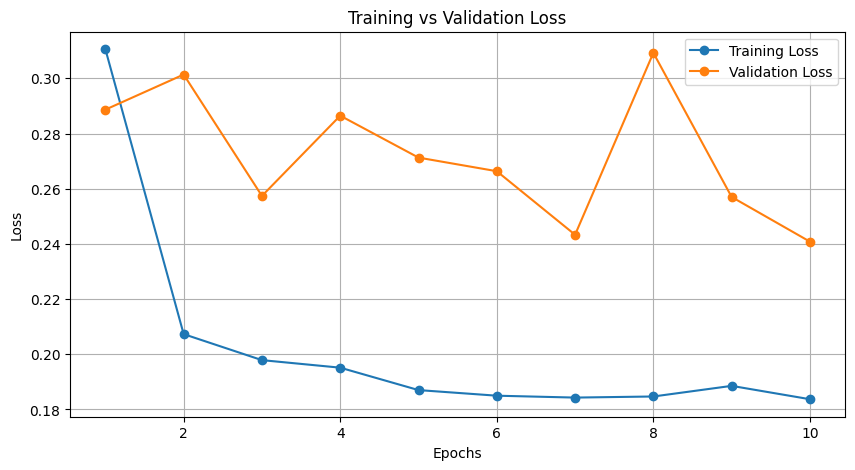

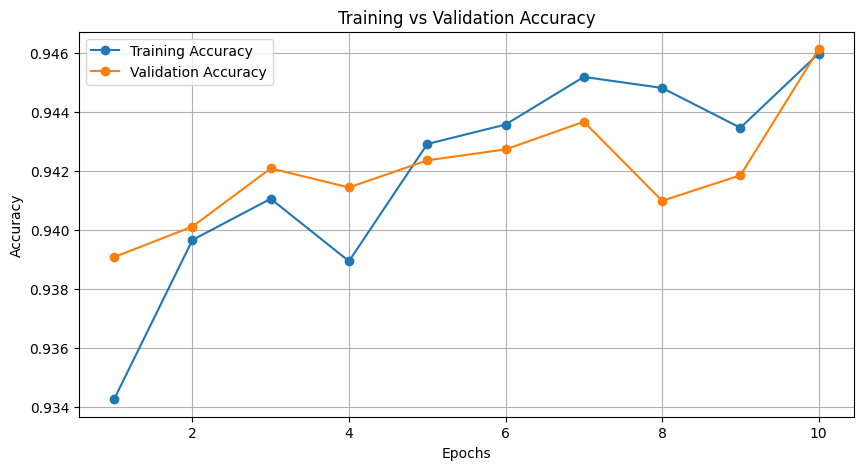

In [1]:
import matplotlib.pyplot as plt
import ast

# Initialize lists
epochs = []
loss = []
val_loss = []
accuracy = []
val_accuracy = []

# Read the file
with open("../training_log.txt", "r") as file:
    for line in file:
        # Split into epoch number and dictionary
        parts = line.split(": ", 1)
        epoch = int(parts[0].split()[1])  # Extract epoch number
        metrics = ast.literal_eval(parts[1])  # Convert string to dictionary
        
        # Append values
        epochs.append(epoch)
        loss.append(metrics['loss'])
        val_loss.append(metrics['val_loss'])
        accuracy.append(metrics['Accuracy'])
        val_accuracy.append(metrics['val_Accuracy'])

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()